In [1]:
import prosail
import matplotlib.pyplot as plt
import numpy as np

In [24]:
n  = 1.2 #Leaf structure parameter
cab = 30 # Chlorophyll content
car = 10 # Carotenoid content
cbrown = 1 # Brown pigments
cw =0.015 # Equivalent water thickness
cm = 0.009 # Leaf mass per unit area
lam, rho, tau = prosail.run_prospect(n, cab, car, cbrown, cw, cm, prospect_version='5')

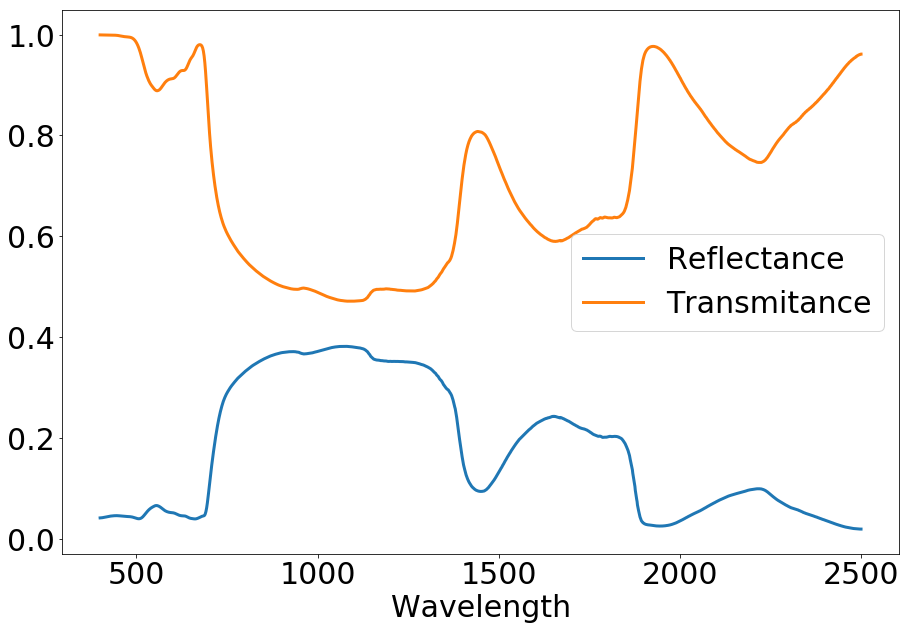

In [110]:
plt.figure(figsize=(15,10))
plt.plot(lam, rho, label = 'Reflectance', linewidth=3)
plt.plot(lam, (1-tau), label = 'Transmitance', linewidth=3)
plt.legend(fontsize=30, loc='center right')
plt.yticks(size=30)
plt.xticks(size=30)
plt.xlabel('Wavelength', size=30);

In [114]:
rho = rho#reflectance
tau = tau#transmittance
lai = 3.0#leaf area index
lidfa = 20#mean leaf angle in degrees
hspot = 2.0#hotspot parameter
sza,tts = 30,30#solar zenith 
vza,tto = 60,60#sensor zenith
raa,psi = 300,300#relative azimuth angles
rsoil0 = np.zeros(2101)
rho_canopy = prosail.run_sail(rho, tau, lai, lidfa, hspot, sza, vza, raa, rsoil0=rsoil0)

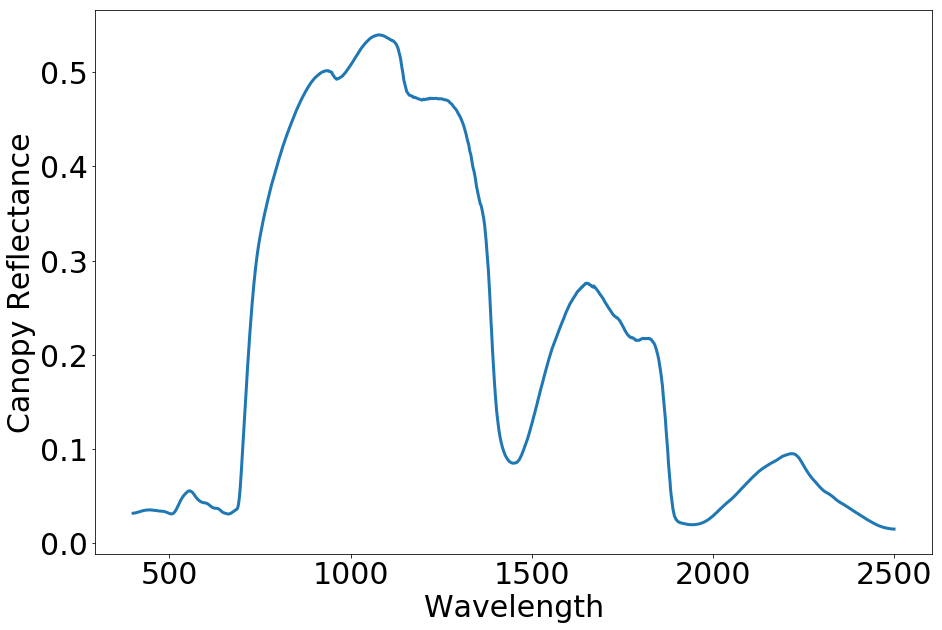

In [115]:
plt.figure(figsize=(15,10))

plt.plot(lam,rho_canopy, linewidth=3)
plt.yticks(size=30)
plt.xticks(size=30)
plt.xlabel('Wavelength', size=30);
plt.ylabel('Canopy Reflectance', size=30);


In [112]:
rho_canopy = prosail.run_prosail(n, cab, car, cbrown, cw, cm, lai, lidfa, hspot, tts, tto, psi, \
                    ant=0.0, alpha=40.0, prospect_version='5', typelidf=2, lidfb=0.0, \
                    factor='SDR', rsoil0=rsoil0, rsoil=None, psoil=None, \
                    soil_spectrum1=None, soil_spectrum2=None)

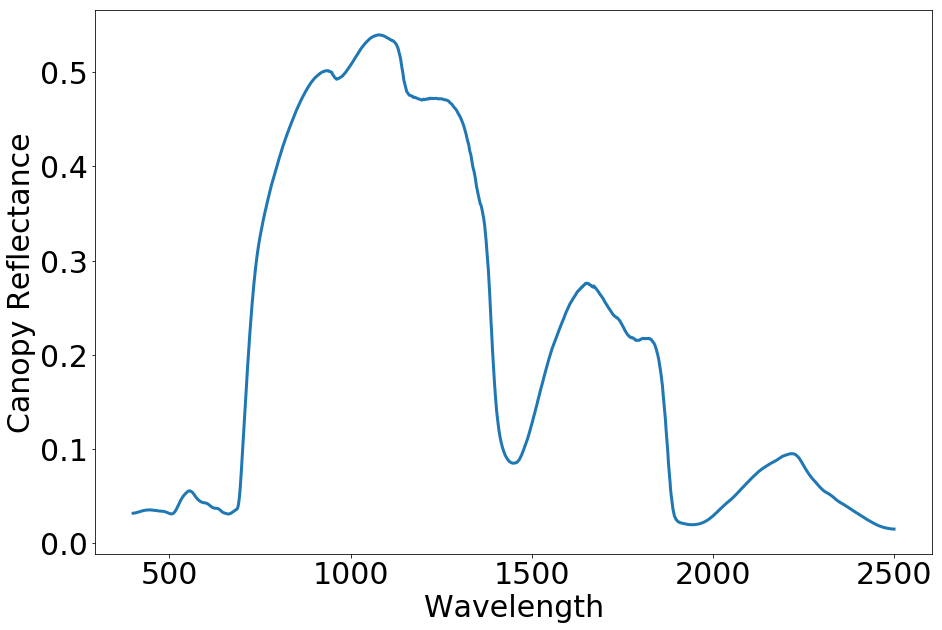

In [113]:
plt.figure(figsize=(15,10))

plt.plot(lam,rho_canopy, linewidth=3)
plt.yticks(size=30)
plt.xticks(size=30)
plt.xlabel('Wavelength', size=30);
plt.ylabel('Canopy Reflectance', size=30);


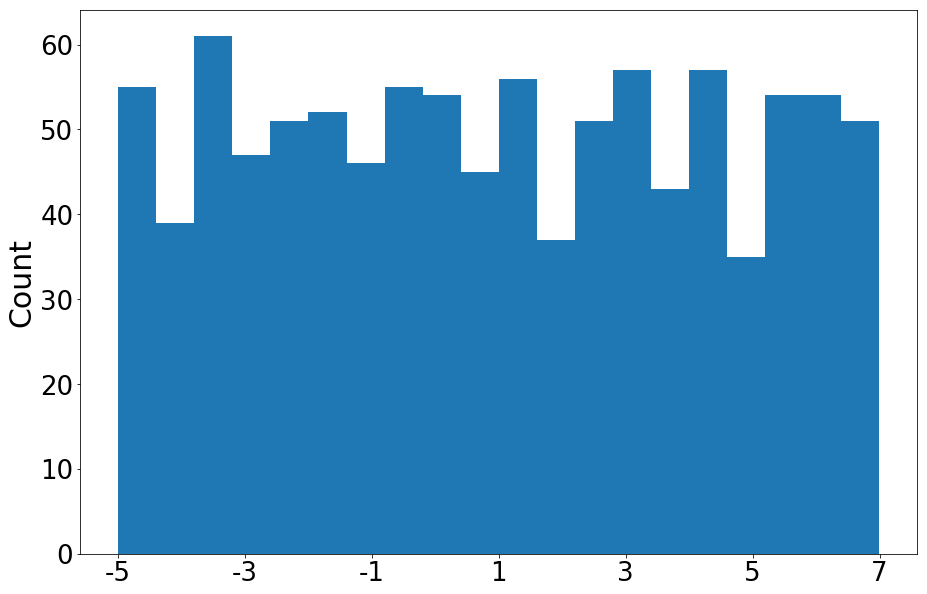

In [174]:
figure, ax = plt.subplots(figsize=(15,10))
s = np.random.uniform(-5.0,7.0,1000)
ax.hist(s, 20, density=False)
ax.set_ylabel('Count', size=30)
ax.tick_params(axis='both', which='major', labelsize=26)
ax.set_xticks(np.arange(-5,8,2));
ax.set_xticklabels(np.arange(-5,8,2), minor=False);

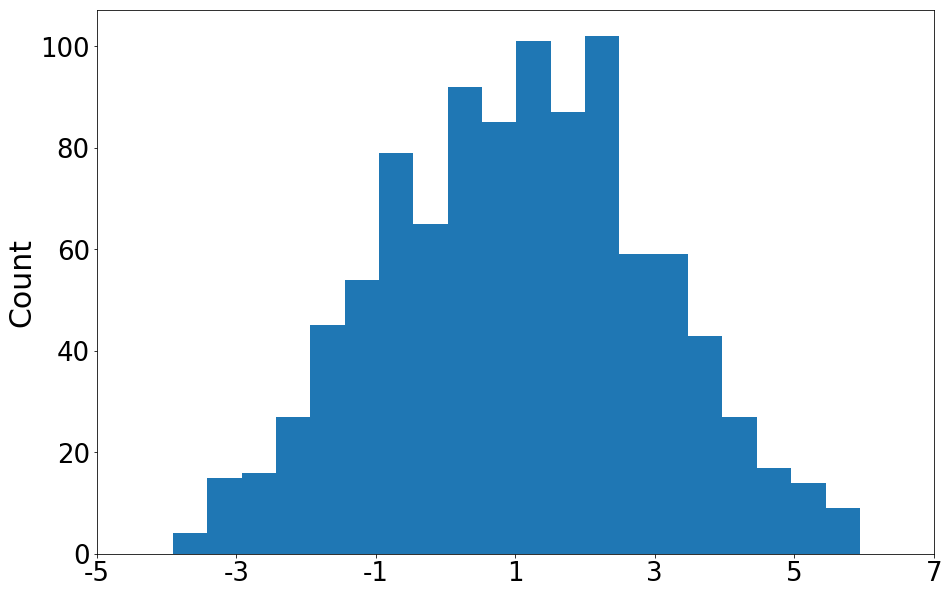

In [196]:
from scipy.stats import truncnorm

lower, upper = -4, 6
mu, sigma = 1.,2.0
s = truncnorm(
    (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
# s = stats.norm(loc=mu, scale=sigma)

figure, ax = plt.subplots(figsize=(15,10))
ax.hist(s.rvs(1000), 20, density=False)
ax.set_ylabel('Count', size=30)
ax.tick_params(axis='both', which='major', labelsize=26)
ax.set_xticks(np.arange(-5,8,2));
ax.set_xticklabels(np.arange(-5,8,2), minor=False);

In [204]:
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

lam, rho, tau = prosail.run_prospect(n, cab, car, cbrown, cw, cm, prospect_version='5')
x = np.linspace(0, 2 * np.pi)

def update(n = 1.0, cab=30):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    lam, rho, tau = prosail.run_prospect(n, cab, car, cbrown, cw, cm, prospect_version='5')
    ax.plot(lam, rho)

    fig.canvas.draw()

interact(update, n=(0.0,3.5), cab=(0.0,100));

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTEuMCwgZGVzY3JpcHRpb249dSduJywgbWF4PTMuNSksIEZsb2F0U2xpZGVyKHZhbHVlPTMwLjAsIGRlc2NyaXB0aW9uPXXigKY=


# Monte Carlos

In [2]:
import numpy as np
import math
import random
from matplotlib import pyplot as plt
from IPython.display import clear_output
PI = 3.1415926
e = 2.71828

('mean output:', 0.4743768971066163, 'std_output:', 0.13339503503137792)


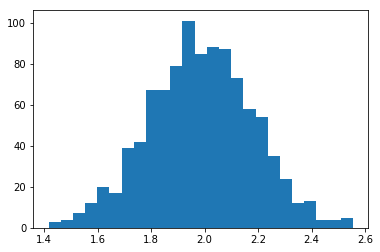

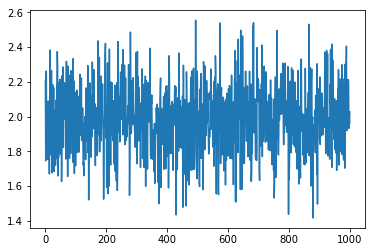

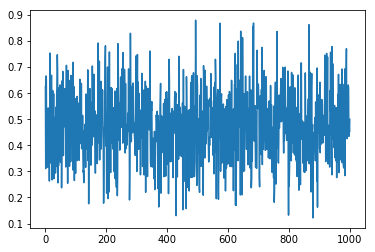

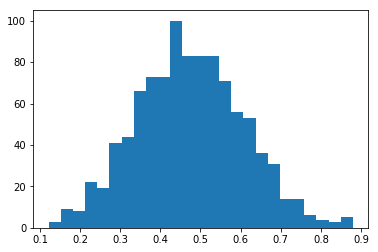

In [32]:
mu = 2
sigma = 0.2

# generate realisations of the parameter
parameter_values = mu + sigma * np.random.randn(1000); parameter_values

# plot as histogram
plt.figure()
plt.hist(parameter_values,25);

# plot vector of the random values (parameter realisations)
plt.figure()
plt.plot(parameter_values, '-');

# simple model to draw from the generated parameter values
output = np.zeros(parameter_values.shape) # allocate output vector

# loop over all realisations and calculate the model output
for i in range(parameter_values.shape[0]):
    parameter = parameter_values[i]
    output[i] = (np.log(parameter))**2
    
# plot output as vector   
plt.figure()
plt.plot(output)

# plot output as histogram
plt.figure()
plt.hist(output,25);

mean_output = output.mean()
stddev_output = output.std()
print ('mean output:', mean_output, 'std_output:', stddev_output)

In [3]:
def get_rand_number(min_value, max_value):
    """
    This function gets a random number from a uniform distribution between
    the two input values [min_value, max_value] inclusively
    Args:
    - min_value (float)
    - max_value (float)
    Return:
    - Random number between this range (float)
    """
    span_range = max_value - min_value
    choice = random.uniform(0,1)
    return min_value + span_range*choice